# Limpeza e EDA dos dados recebidos


## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura e carregamento dos dados

In [2]:
df = pd.read_csv('../data/vendas_jittered.csv')
df.head()

,Data,Produto,Quantidade,ValorMedio,Total,Func,Ndoc,Tipo,CST,NCM,Codigo,Categoria
0,2015-01-02,OLEO SELENIA SPRINTA 4T 20W-50,1.0,11.70,11.70,4,24039,C,60,27101932,913,OLEO
1,2015-01-02,PNEU TRAS. BIZ LEVORIN DAKA 80/100X14,1.0,109.25,109.25,3,24049,C,60,40114000,829,PNEU
2,2015-01-02,CAMARA AR CG/TITAN LEVORIN (SA 18),1.0,24.61,24.61,4,24039,C,60,40139000,442,CAMARA
3,2015-01-02,CAMARA AR TRAS. BROS/XLR 250 PIRELLI,1.0,37.75,37.75,4,24043,C,60,40139000,1376,CAMARA
4,2015-01-02,CABO EMB. KS/ES 2002/08 FAN IMP/CG-83,1.0,10.39,10.39,3,24037,C,60,84831030,2146,CABO


## Análise

### Início da análise estrutural dos dados

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255895 entries, 0 to 255894
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Data        255895 non-null  object 
 1   Produto     255895 non-null  object 
 2   Quantidade  255895 non-null  float64
 3   ValorMedio  255895 non-null  float64
 4   Total       255895 non-null  float64
 5   Func        255895 non-null  int64  
 6   Ndoc        255895 non-null  int64  
 7   Tipo        255895 non-null  object 
 8   CST         255895 non-null  int64  
 9   NCM         255895 non-null  int64  
 10  Codigo      255895 non-null  int64  
 11  Categoria   255895 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 23.4+ MB


In [4]:
df.describe()

,Quantidade,ValorMedio,Total,Func,Ndoc,CST,NCM,Codigo
count,255895.000000,255895.000000,255895.000000,255895.000000,255895.000000,255895.000000,2.558950e+05,255895.000000
mean,1.278110,21.954933,23.406216,3.636097,67053.554774,58.289619,6.895641e+07,3055.969562
std,1.095199,35.574053,38.087845,1.009804,51968.250656,10.749343,2.257513e+07,2518.062502
min,1.000000,0.100000,0.100000,0.000000,1.000000,0.000000,2.710193e+07,1.000000
25%,1.000000,3.890000,4.660000,3.000000,17108.000000,60.000000,4.016930e+07,787.000000
50%,1.000000,11.220000,12.300000,4.000000,60796.000000,60.000000,8.421310e+07,2635.000000
75%,1.000000,22.600000,23.660000,4.000000,111154.500000,60.000000,8.714100e+07,5060.000000
max,178.000000,762.310000,1699.080000,9.000000,166092.000000,260.000000,9.613900e+07,8971.000000


Analisando a coluna quantidade, podemos ver que até o terceiro quartil temos o valor 1, o que indica que grande parte dos itens são vendidos em unidade.
Já o valor Médio, podemos ver que, em média, os valores não são altos.
Com essas duas informações já sabemos, também, que o valor total, em média, não será muito elevado, o que se confirma.


In [5]:
df.describe(include='object')

,Data,Produto,Tipo,Categoria
count,255895,255895,255895,255895
unique,3054,6582,2,223
top,2016-09-02,OLEO SELENIA SPRINTA 4T 20W-50,P,OLEO
freq,286,8937,163009,24361


### Remoção de colunas que não utilizaremos
Não utilizaremos as colunas NCM e CST

In [6]:
df.drop(columns=['CST', 'NCM'], inplace=True)

### Conversão dos dados necessários

Podemos ver que temos que categorizar os Funcinoários (não queremos simular uma hierarquia entre eles), converter Data para datetime e mudar quantidade para valores inteiros, não se vende "valores quebrados" de peças.

In [7]:
df['Func'] = df['Func'].astype('category')
df['Data'] = pd.to_datetime(df['Data'], format='%Y-%m-%d')

In [8]:
df.head()

,Data,Produto,Quantidade,ValorMedio,Total,Func,Ndoc,Tipo,Codigo,Categoria
0,2015-01-02,OLEO SELENIA SPRINTA 4T 20W-50,1.0,11.70,11.70,4,24039,C,913,OLEO
1,2015-01-02,PNEU TRAS. BIZ LEVORIN DAKA 80/100X14,1.0,109.25,109.25,3,24049,C,829,PNEU
2,2015-01-02,CAMARA AR CG/TITAN LEVORIN (SA 18),1.0,24.61,24.61,4,24039,C,442,CAMARA
3,2015-01-02,CAMARA AR TRAS. BROS/XLR 250 PIRELLI,1.0,37.75,37.75,4,24043,C,1376,CAMARA
4,2015-01-02,CABO EMB. KS/ES 2002/08 FAN IMP/CG-83,1.0,10.39,10.39,3,24037,C,2146,CABO


In [9]:
df['Quantidade'] = df['Quantidade'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255895 entries, 0 to 255894
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Data        255895 non-null  datetime64[ns]
 1   Produto     255895 non-null  object        
 2   Quantidade  255895 non-null  int64         
 3   ValorMedio  255895 non-null  float64       
 4   Total       255895 non-null  float64       
 5   Func        255895 non-null  category      
 6   Ndoc        255895 non-null  int64         
 7   Tipo        255895 non-null  object        
 8   Codigo      255895 non-null  int64         
 9   Categoria   255895 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 17.8+ MB


### Contagem dos valores nulos

In [11]:
df.isna().sum()

Data          0
Produto       0
Quantidade    0
ValorMedio    0
Total         0
Func          0
Ndoc          0
Tipo          0
Codigo        0
Categoria     0
dtype: int64

Não temos valores nulos!

---

### Cardinalidade 

In [12]:
print('-- Cada coluna possui os seguintes valores únicos:')
print("Produtos únicos:", df['Produto'].nunique())
print("Categorias únicas:", df['Categoria'].nunique())
print("Funcionários únicos:", df['Func'].nunique())
print("Nº de vendas (Ndoc):", df['Ndoc'].nunique())

-- Cada coluna possui os seguintes valores únicos:
Produtos únicos: 6582
Categorias únicas: 223
Funcionários únicos: 9
Nº de vendas (Ndoc): 113075


### Análise de Produtos/Categorias
Vamos ver quais produtos e categorias são mais e menos frequentes.
Representando os produtos mais e menos vendidos.

In [13]:
prod_freq = df['Produto'].value_counts()
prod_freq.head(10)

Produto
OLEO SELENIA SPRINTA 4T 20W-50           8937
OLEO DULUB MOTO 4T 20W50 SL              3404
OLEO LUBRAX GP MOTO 4T 20W50             3307
OLEO MOBIL 4T 20 W 50                    2954
ROLAM. 6301 IMP. - DIANT. CG             1978
VISEIRA CAPACETE SAN MARINO CRISTAL 0    1740
LAMP. STOP CG 12V - IMP.                 1624
OLEO MOTO 4T 20W50                       1571
RET. VALVULA BIZ/TIT150/2002/03/04 MA    1530
SERV. CAPA BANCO                         1528
Name: count, dtype: int64

In [14]:
print(prod_freq.tail(10))

Produto
GUARNICAO ESCAP. CB 400 (GR)             1
RET. MESA BIZ PART.(INT.ELETRICA) VED    1
CORRENTE COM. POP-110I 90L WGK           1
MACANETA FREIO POP 110I 2018/22 3165     1
ESTATOR COMPL. BROS 150 09/14 ZOUIL-1    1
KIT EMB. CG-150 WGK                      1
CABO FREIO CG/FAN 150 2014/15/CG160      1
INTERRUP. IGNIC. BIZ-110I 2016/17 C/T    1
PARALAMA DIANT. BIZ 04/05 VERM.          1
VIRABREQUIM CG-150 S/ROLAM.AUDAX         1
Name: count, dtype: int64


4 dos 5 produtos mais vendidos são óleo.

In [15]:
cat_freq = df['Categoria'].value_counts(normalize=True) * 100
print(cat_freq)

Categoria
OLEO           9.519920
RET.           5.379159
PARAF.         5.233787
LAMP.          4.140761
JUNTA          4.127865
                 ...   
GANCHO         0.000391
CORPO          0.000391
LIMITADOR      0.000391
BORRACHA       0.000391
VIRABREQUIM    0.000391
Name: proportion, Length: 223, dtype: float64


Aqui acima temos as categorias que mais vendem em porcentagem.
Possivelmente as de baixa frequência podem ser colocadas junto a outra categoria.

In [16]:
print(cat_freq.head(10))

Categoria
OLEO       9.519920
RET.       5.379159
PARAF.     5.233787
LAMP.      4.140761
JUNTA      4.127865
CABO       3.768342
PORCA      2.801930
KIT        2.655777
ROLAM.     2.499072
ARRUELA    1.950409
Name: proportion, dtype: float64


In [17]:
print(cat_freq.tail(10))

Categoria
X-PNEU         0.000391
LAMPADA        0.000391
DOBRADICA      0.000391
X-PASTILHA     0.000391
SACA           0.000391
GANCHO         0.000391
CORPO          0.000391
LIMITADOR      0.000391
BORRACHA       0.000391
VIRABREQUIM    0.000391
Name: proportion, dtype: float64


Text(0, 0.5, 'Vendas')

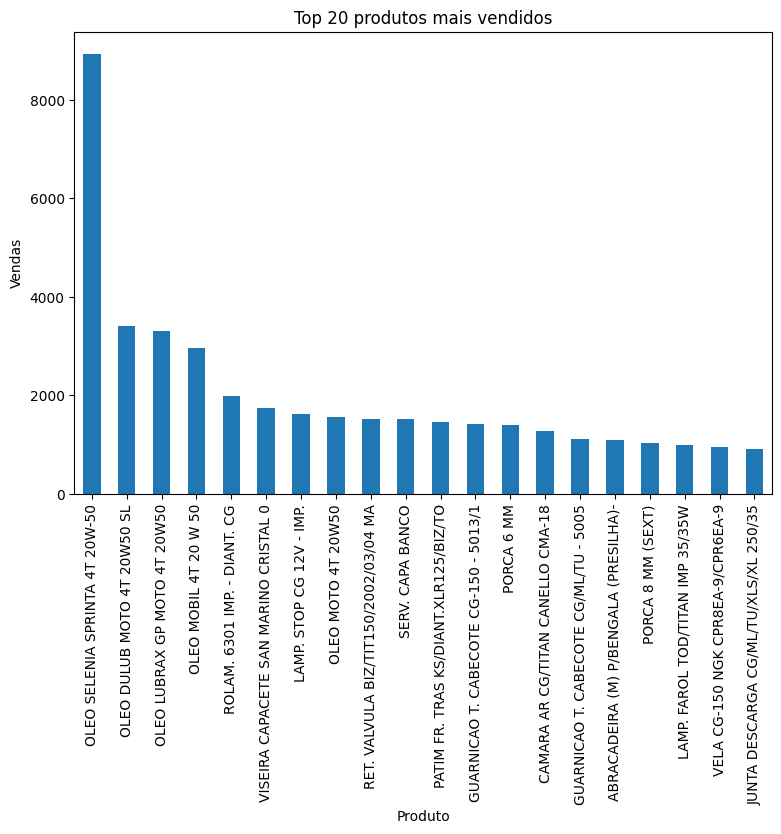

In [18]:
prod_freq[0:20].plot(kind='bar', figsize=(9,6), title='Top 20 produtos mais vendidos')
plt.xlabel('Produto')
plt.ylabel('Vendas')

---

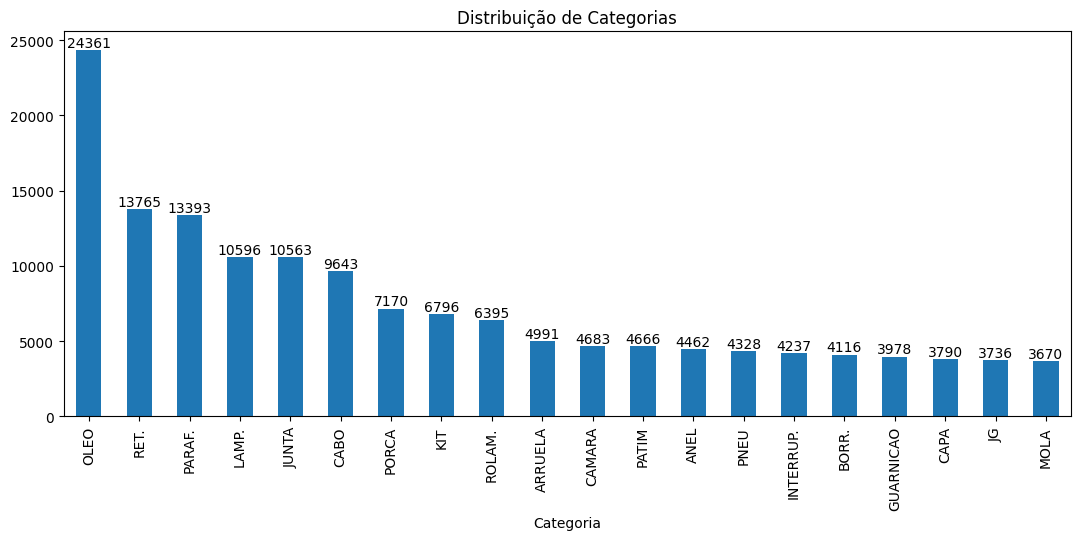

In [19]:
cat_freq_nao_norm = df['Categoria'].value_counts()
ax = cat_freq_nao_norm[0:20].plot(kind='bar', figsize=(13,5), title='Distribuição de Categorias')
ax.bar_label(ax.containers[0], fmt='%.0f')
plt.show()

#### Análise rápida da frequência dos funcionários

In [20]:
func_freq = df['Func'].value_counts()
print(func_freq.describe())

count         9.000000
mean      28432.777778
std       49959.140605
min           2.000000
25%         397.000000
50%        3291.000000
75%       12528.000000
max      126912.000000
Name: count, dtype: float64


In [21]:
func_freq

Func
4    126912
3    104451
7     12528
2      7619
1      3291
0       690
8       397
9         5
6         2
Name: count, dtype: int64

A loja tem 2 principais vendedores, com mais de 100mil vendas cada, enquanto o terceiro maior tem apenas 12mil vendas cadastradas. Os outros funcinários podem ter tido pouco tempo de trabalho, ou apenas tem outras funções dentro da loja. <br/>
Vamos ver um **gráfico**:

Text(0, 0.5, 'Número de Vendas')

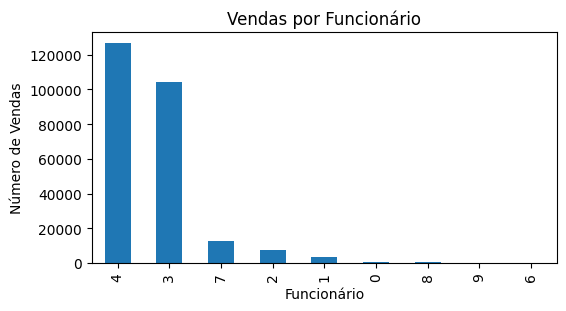

In [22]:
func_freq.plot(kind='bar', figsize=(6,3), title='Vendas por Funcionário')
plt.xlabel('Funcionário')
plt.ylabel('Número de Vendas')

### Análise Univariada das colunas

#### Variáveis Numéricas
Temos como variaveis numéricas `Quantidade`, `ValorMedio`, `Total`. Então vamos analisar separadamente cada uma para entender suas distribuições, valores extremos, assimetrias e sazonalidade.

##### Histograma


<Axes: xlabel='Total', ylabel='Count'>

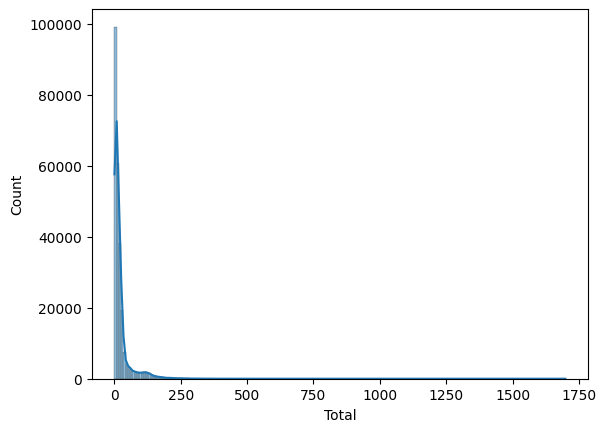

In [23]:
sns.histplot(df['Total'], bins=200, kde=True)

<Axes: xlabel='Quantidade', ylabel='Count'>

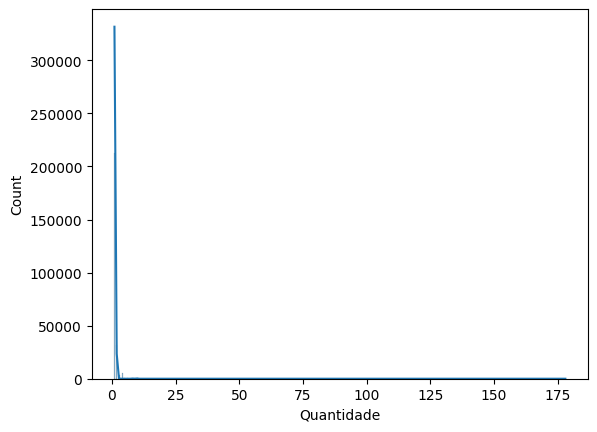

In [24]:
sns.histplot(df['Quantidade'], bins=500, kde=True)

<Axes: xlabel='ValorMedio', ylabel='Count'>

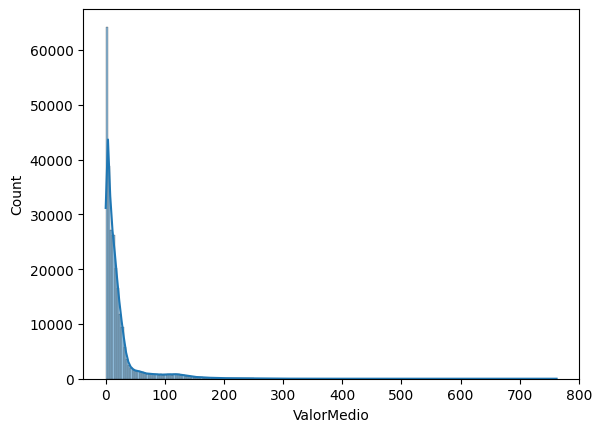

In [25]:
sns.histplot(df['ValorMedio'], bins=200, kde=True)

<Axes: xlabel='ValorMedio', ylabel='Count'>

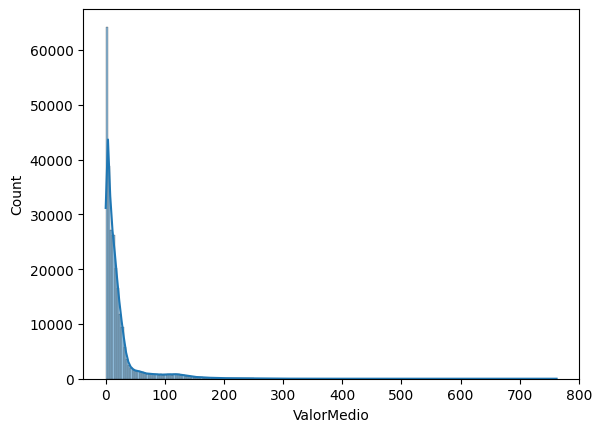

In [26]:
sns.histplot(df['ValorMedio'], bins=200, kde=True)

##### Análise da coluna ValorMedio

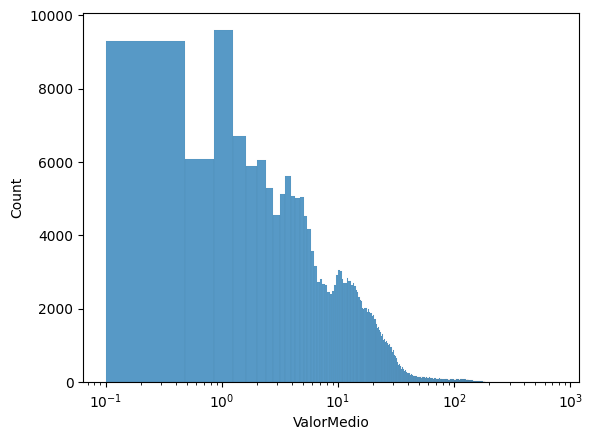

In [27]:
sns.histplot(df['ValorMedio'], bins=2000)
plt.xscale('log')
plt.show()

<Axes: ylabel='ValorMedio'>

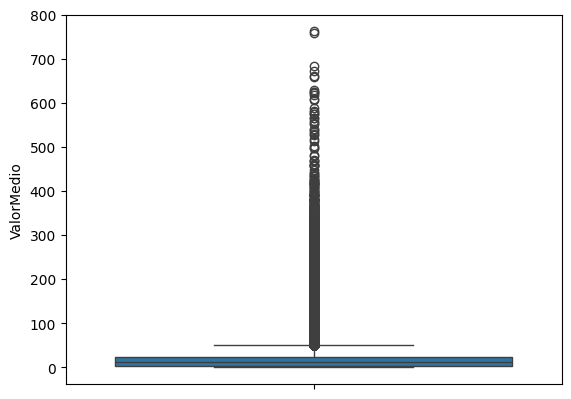

In [28]:
sns.boxplot(df['ValorMedio'])

Podemos ver que todas as peças de valor medio acima de aproximadamente R$80,00 são consideradas outliers.

##### Análise da coluna Quantidade

In [29]:
df['Quantidade'].describe()

count    255895.000000
mean          1.278110
std           1.095199
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         178.000000
Name: Quantidade, dtype: float64

Podemos ver a mediana muito próxima da média, o que indica que os dados estão bem distribuidos. No entanto podemos ver que grande parte é porque o valor é 1.
Com o máximo de 178, teremos muitos considerados como outliers. <br/>
Vamos ver o boxplot como fica:

<Axes: ylabel='Quantidade'>

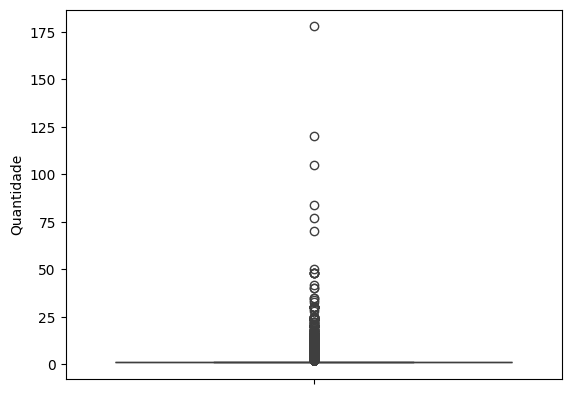

In [30]:
sns.boxplot(df['Quantidade'])

<Axes: ylabel='Quantidade_log'>

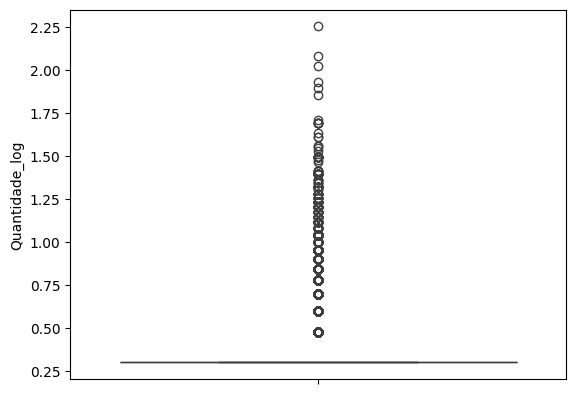

In [31]:
df['Quantidade_log'] = np.log10(df['Quantidade']+1)
sns.boxplot(df['Quantidade_log'])

Fazendo uma análise com log na base 10 consguimos ver de onde começam os outliers, como é uma coluna som valores do tipo inteiro sabemos que o valor é 2. <BR/>
x=Quantidade+1 <br/>
log10​(x)=0.50 <br/>
0.5 * ln(10) =~ 0.5 * 2.3 =~ 1.15 (aproximadamente)<br/>
e^1.15 =~ 3.15 =~ x (aproximadamente) <br/>
Como x é Quantidade + 1:    3.15 = Q + 1 <br>
Q = 3.15 - 1 = 2.15

Ou seja, qualquer valor de 2 para cima é considerado um outlier.

##### Análise da coluna Total

Intuitivamente com as análises anteriores teremos um resultado muito próximo de "ValorMedio", afinal a "Quantidade" é quase sempre 1. Vejamos

<Axes: ylabel='Total'>

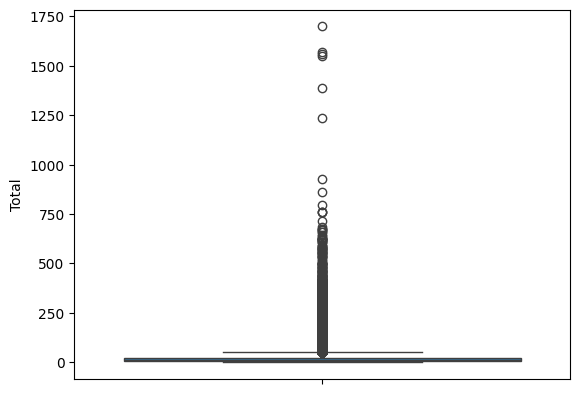

In [32]:
sns.boxplot(df['Total'])

O limite superior do boxplot é próximo a 100, assim como o "ValorMedio" que era em 80.

Mas é verdade que essas três colunas não contam a história completa, afinal os dados foram separados de forma que o pedido pode ser composto de várias linhas. Depois das análises individuais vamos fazer a junção e então uma análise de **ticket médio**.

#### Variáveis Categóricas

##### Categoria

In [33]:
cat_order = df.groupby('Categoria')['Total'].sum().sort_values(ascending=False).index

In [34]:
cat_order[0:25] # Apenas o top 15, para ficar visível

Index(['PNEU', 'KIT', 'OLEO', 'BATERIA', 'CILINDRO', 'CAPACETE', 'PISTAO/ANEL',
       'CABO', 'CAMARA', 'RET.', 'ROLAM.', 'PATIM', 'LAMP.', 'AMORTEC.', 'JG',
       'INTERRUP.', 'PEDAL', 'ARO', 'CONJUNTO', 'CAPA', 'CAIXA', 'CARBURADOR',
       'ESPELHO', 'EIXO', 'DISCO'],
      dtype='object', name='Categoria')

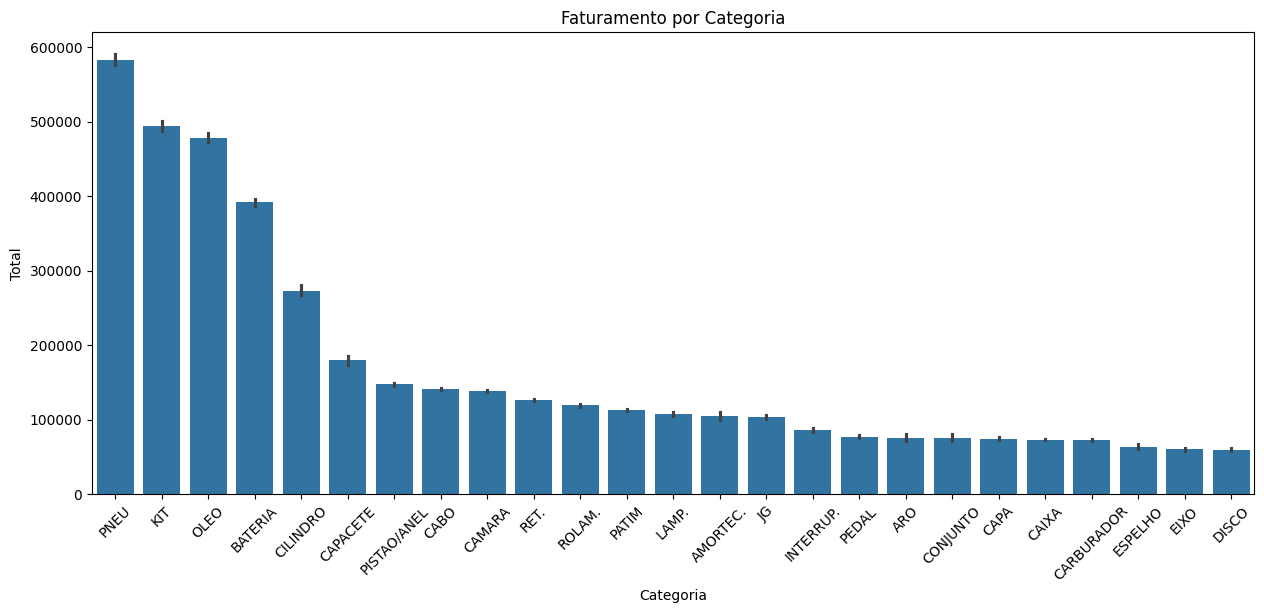

In [35]:
plt.figure(figsize=(15,6))
sns.barplot(data=df, x='Categoria', y='Total', order=cat_order[0:25], estimator=sum)
plt.xticks(rotation=45)
plt.title('Faturamento por Categoria')
plt.show()

Podemos ver que as 5 melhores categorias são: *Pneu*, *Kit*, *Oleo*, *Bateria* e *Cilindro*<BR>
Depois iremos fazer esta análise ao longo do tempo para ver se houve alguma mudança no top 10, e assim ver o comportamento do mercado, notando categorias que estarão em ascenção ou declínio.

##### Funcionário

In [36]:
func_faturamento_order = df.groupby('Func')['Total'].sum()

C:\Users\Igor\AppData\Local\Temp\ipykernel_8464\1408201187.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  func_faturamento_order = df.groupby('Func')['Total'].sum()


In [37]:
func_faturamento_order

Func
0    3.499277e+04
1    1.107424e+05
2    1.233343e+05
3    2.508026e+06
4    2.923487e+06
6    2.352000e+01
7    2.791647e+05
8    9.524390e+03
9    2.378300e+02
Name: Total, dtype: float64

<span style='color:red'>**OBS**</span>: O valor 'total' do Func 1 aqui está com mais de uma casa decimal, provavelmente é por causa de floating point.

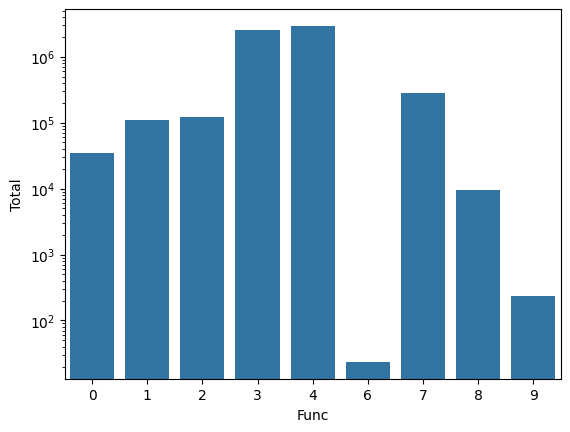

In [38]:
sns.barplot(func_faturamento_order)
plt.yscale('log')
plt.show()

Vamos comparar com a frequência de venda de cada funcionário, vamos ver se tem algum funcionário que aparenta vendar as peças mais caras.

In [39]:
func_freq

Func
4    126912
3    104451
7     12528
2      7619
1      3291
0       690
8       397
9         5
6         2
Name: count, dtype: int64

<Axes: xlabel='Func', ylabel='count'>

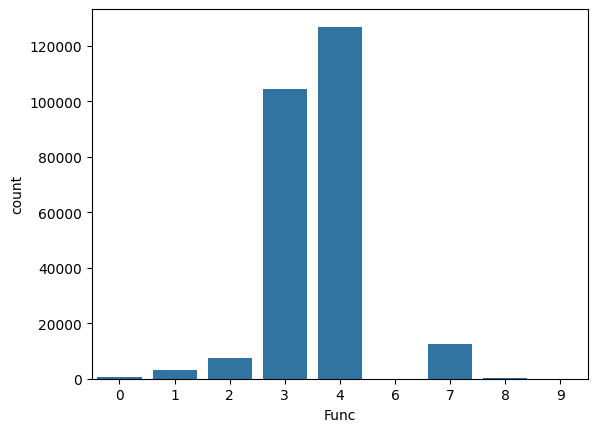

In [40]:
sns.barplot(func_freq)

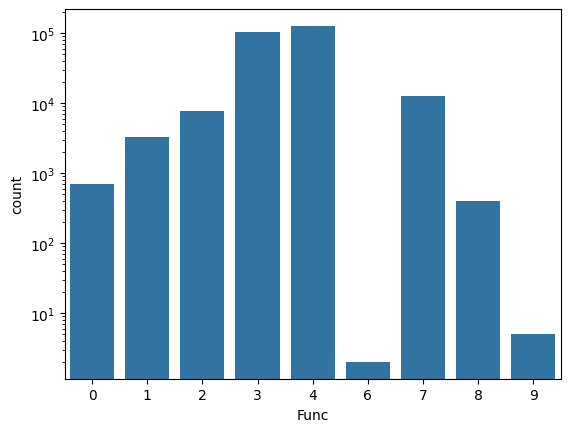

In [41]:
sns.barplot(func_freq)
plt.yscale('log')
plt.show()

In [42]:
func_faturamento_order/func_freq

Func
0    50.714159
1    33.650062
2    16.187728
3    24.011512
4    23.035547
6    11.760000
7    22.283258
8    23.990907
9    47.566000
dtype: float64

Em média, os funcionários *0* e *9* costuma vender itens mais caros.

In [43]:
(func_faturamento_order/func_freq).describe()

count     9.000000
mean     28.133241
std      13.337447
min      11.760000
25%      22.283258
50%      23.990907
75%      33.650062
max      50.714159
dtype: float64

##### Tipo de venda

In [44]:
df['Tipo'].value_counts()

Tipo
P    163009
C     92886
Name: count, dtype: int64

Temos quase 2 vezes de pedidos tipo *P* do que tipo *C*.<BR>
Tipo *P* deve ser pedido, e tipo *C* deve ser crediário. <br>
Faz sentido afinal se abre crediário para alguns clientes escolhidos e confiáveis.

Checkando o valor de cada:

In [45]:
total_tipo = df.groupby('Tipo')['Total'].sum()
total_tipo

Tipo
C    2.963755e+06
P    3.025778e+06
Name: Total, dtype: float64

<Axes: xlabel='Tipo', ylabel='Total'>

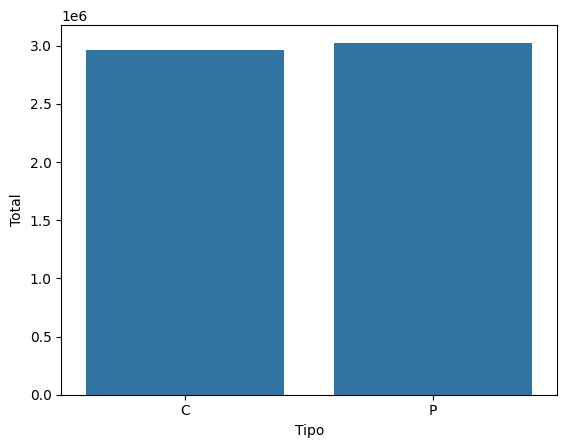

In [46]:
sns.barplot(total_tipo)

Apesar da diferença tamanho para crediário e pedidos, o faturamento total de cada é bem semelhante. <br>
Faz sentido pensar que clientes com conta na loja usam seus crediários para comprar produtos mais caros e irem pagando parceladamente.

##### Produto
Para produto podemos analisar a frequência de venda de cada produto.
<span style='color:red'>Aqui devemos tomar um cuidado especial, pois cada contagem de linha pode ter uma certa quantidade de produtos diferente de 1.</span> Como analisamos antes, vimos a raridade desta ocorrencia, mas ainda assim devemos fazer a contagem considerando a *quantidade*. <br>
Vamos ver como seria a diferença:

In [47]:
df['Produto'].value_counts()[0:10]

Produto
OLEO SELENIA SPRINTA 4T 20W-50           8937
OLEO DULUB MOTO 4T 20W50 SL              3404
OLEO LUBRAX GP MOTO 4T 20W50             3307
OLEO MOBIL 4T 20 W 50                    2954
ROLAM. 6301 IMP. - DIANT. CG             1978
VISEIRA CAPACETE SAN MARINO CRISTAL 0    1740
LAMP. STOP CG 12V - IMP.                 1624
OLEO MOTO 4T 20W50                       1571
RET. VALVULA BIZ/TIT150/2002/03/04 MA    1530
SERV. CAPA BANCO                         1528
Name: count, dtype: int64

In [48]:
produto_freq = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)
produto_freq[0:10]

Produto
OLEO SELENIA SPRINTA 4T 20W-50           10198
ROLAM. 6301 IMP. - DIANT. CG              3985
OLEO DULUB MOTO 4T 20W50 SL               3773
OLEO LUBRAX GP MOTO 4T 20W50              3433
RET. VALVULA BIZ/TIT150/2002/03/04 MA     3360
OLEO MOBIL 4T 20 W 50                     3232
PORCA 6 MM                                3181
ABRACADEIRA (M) P/BENGALA (PRESILHA)-     3108
BUCHA COROA CG (NAYLON)-3025              2292
PORCA 8 MM (SEXT)                         2238
Name: Quantidade, dtype: int64

Podemos ver que houve uma diferença no top 10. Depois iremos analisar também quais produtos tendem a sair em quantidades maiores que 1, e também quais produtos tendem a sair juntos, para criar insights mais interessantes para a loja.

In [49]:
total_produto = df.groupby('Produto')['Total'].sum().sort_values(ascending=False)

In [50]:
total_produto[0:10]

Produto
OLEO SELENIA SPRINTA 4T 20W-50           151346.88
BATERIA ERBS ERX 6-BS                    104240.61
PNEU TRAS. CG 150 VIPAL 90/90-18 ST-3     94746.65
OLEO LUBRAX GP MOTO 4T 20W50              79032.27
OLEO MOBIL 4T 20 W 50                     74769.22
BATERIA KOMOTORS KTX 6                    62352.98
OLEO DULUB MOTO 4T 20W50 SL               57581.84
PNEU TRAS. BIZ VIPAL ST-200 80/100-14     47927.32
PNEU DIANT. CG 150 VIPAL ST-300 2.75X     40733.68
PATIM FR. TRAS KS/DIANT.XLR125/BIZ/TO     40138.78
Name: Total, dtype: float64

In [51]:
total_produto.keys()[0]

'OLEO SELENIA SPRINTA 4T 20W-50'

##### Número do Pedido

In [52]:
df['Ndoc'].value_counts()

Ndoc
6911      147
15234     105
42         91
438        71
131427     70
         ... 
1788        1
1805        1
166045      1
166054      1
166039      1
Name: count, Length: 113075, dtype: int64

In [53]:
df.loc[df['Ndoc'] == 6911]

,Data,Produto,Quantidade,ValorMedio,Total,Func,Ndoc,Tipo,Codigo,Categoria,Quantidade_log
11232,2016-09-02,CABO FREIO KS 2000/2001 IMP./SCUD,1,13.31,13.31,3,6911,C,5012,CABO,0.30103
11240,2016-09-02,OLEO 4T SPEEDY SJ-20W50,1,9.72,9.72,3,6911,C,4103,OLEO,0.30103
11248,2016-09-02,PNEU DIANT. CG 150 VIPAL ST-200 2.75X,1,96.98,96.98,3,6911,C,6222,PNEU,0.30103
11250,2016-09-02,PNEU TRAS. CG 150 VIPAL 90/90-18 ST-2,1,106.24,106.24,3,6911,C,6124,PNEU,0.30103
11254,2016-09-02,VELA KS/ES 002/003 DPR8EA-9 ORIG.-980,1,14.14,14.14,3,6911,C,1999,VELA,0.30103
...,...,...,...,...,...,...,...,...,...,...,...
11465,2016-09-02,PISTAO/ANEL 0.25 CG METAL LEVE-1366.0,1,45.91,45.91,3,6911,C,4091,PISTAO/ANEL,0.30103
11467,2016-09-02,BIELA CG 83 METAL LEVE 1367,1,57.72,57.72,3,6911,C,2850,BIELA,0.30103
11468,2016-09-02,VALV. ADM. CG (RIC-5170),1,16.54,16.54,3,6911,C,1882,VALV.,0.30103
11473,2016-09-02,LAMP. FAROL TOD/TITAN IMP 35/35W,1,6.91,6.91,3,6911,C,457,LAMP.,0.30103


Há alguma coisa estranha, pois o mesmo pedido aparece uma vez em `2020-08-19` e várias também `2016-09-02` 

In [54]:
df[['Ndoc','Tipo']].value_counts()

Ndoc    Tipo
6911    C       147
15234   C       105
42      C        91
438     C        71
131427  P        70
               ... 
166073  P         1
166070  P         1
166069  P         1
166066  P         1
150286  P         1
Name: count, Length: 113075, dtype: int64

Temos no total 11308 vendas, incluindo `Pedidos` e `Crediários`. O número não muda separando ou não por Tipo, o que nos indica que os tipos de vendas tem o mesmo identificador organizacional de venda.

#### Variável Temporal